In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit

from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix,PrecisionRecallCurve


In [3]:
pima = pd.read_csv('../../Lab1/Heenal/Data/PimaIndians.csv')

In [4]:
# converting the target into numerical values
lb = LabelBinarizer()
pima['test'] = lb.fit_transform(pima['test'].values)


In [5]:
# Selecting glucose and triceps as features

X = pima.drop(['test', 'pregnant', 'diastolic', 'insulin', 'diabetes','bmi', 'triceps'],axis = 1).values

In [6]:
y = pima['test'].values

In [7]:
# Splitting the dataset into TRAIN and TEST sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1000, gamma=10) 

In [53]:
model.fit(X_train_std, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
model.score(X_test_std, y_test)

0.7542372881355932

In [55]:
y_pred= model.predict(X_test_std)

In [56]:
metrics.accuracy_score(y_test, y_pred)

0.7542372881355932

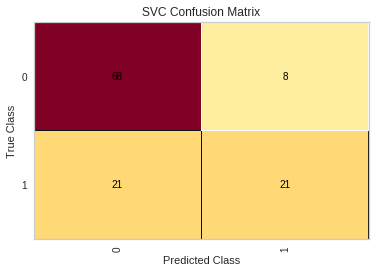

In [57]:
# Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(model, classes=[0,1])
cm.score(X_test_std, y_test)
cm.poof()

In [58]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')


In [59]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

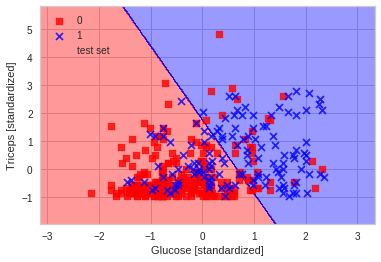

In [60]:
plot_decision_regions(X_combined_std,
                      y_combined, classifier=model,
                      test_idx=range(275,392))

plt.xlabel('Glucose [standardized]')
plt.ylabel('Triceps [standardized]')
plt.legend(loc='upper left')
plt.show()


In [61]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (model.intercept_[0]) / w[1]

In [73]:
model.coef_

array([[1.0384787 , 0.39529773]])

In [62]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


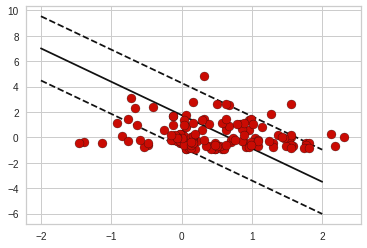

In [72]:
# plot the line, the points, and the nearest vectors to the plane


fignum = 1
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, zorder=10, edgecolors='k', color = 'r')
#plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

plt.figure(fignum, figsize=(9, 8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')




# Plotting the learning curve using sklearn

In [35]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

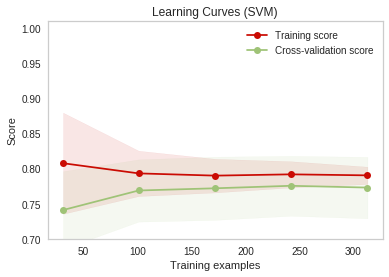

In [40]:
# Plotting for SVM
title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='linear', C=10, gamma=1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()

In [13]:
from scipy.stats import norm
from matplotlib import pyplot

In [41]:
X = pima[['insulin']].values
y = pima[['test']].values

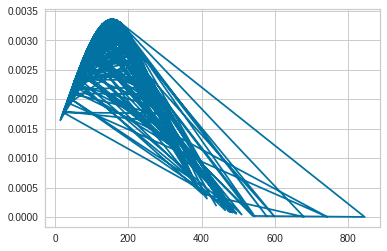

In [42]:
pdf = norm.pdf(X, X.mean(), X.std())
pyplot.plot(X, pdf)
pyplot.show()

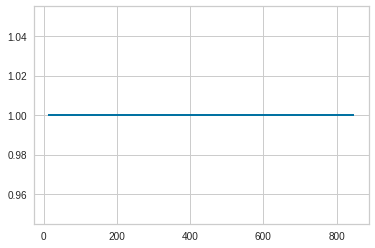

In [43]:
cdf = norm.cdf(X)
# plot
pyplot.plot(X, cdf)
pyplot.show()

In [21]:
X.mean()

29.145408163265305

In [22]:
X.std()

10.503001482410882